In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/Visi Komputer/Instansion Segmentation/panoptic-indoor-segmentation.v5i.coco.zip" -d /content/dataset

In [14]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd
import cv2

In [5]:
train_dir = "/content/dataset/train"
annotation_path = os.path.join(train_dir, "_annotations.coco.json")

print("Path anotasi:", annotation_path)
print("Apakah file ada?", os.path.exists(annotation_path))

Path anotasi: /content/dataset/train/_annotations.coco.json
Apakah file ada? True


In [7]:
with open(annotation_path, "r") as f:
    coco = json.load(f)

print("Jumlah gambar:", len(coco["images"]))
print("Jumlah anotasi:", len(coco["annotations"]))
print("Jumlah kelas:", len(coco["categories"]))

Jumlah gambar: 397
Jumlah anotasi: 4479
Jumlah kelas: 75


In [19]:
base_path = "/content/dataset"

for folder in ["train", "valid", "test"]:
    path = os.path.join(base_path, folder)
    num_images = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{folder}: {num_images} gambar")

train: 397 gambar
valid: 166 gambar
test: 359 gambar


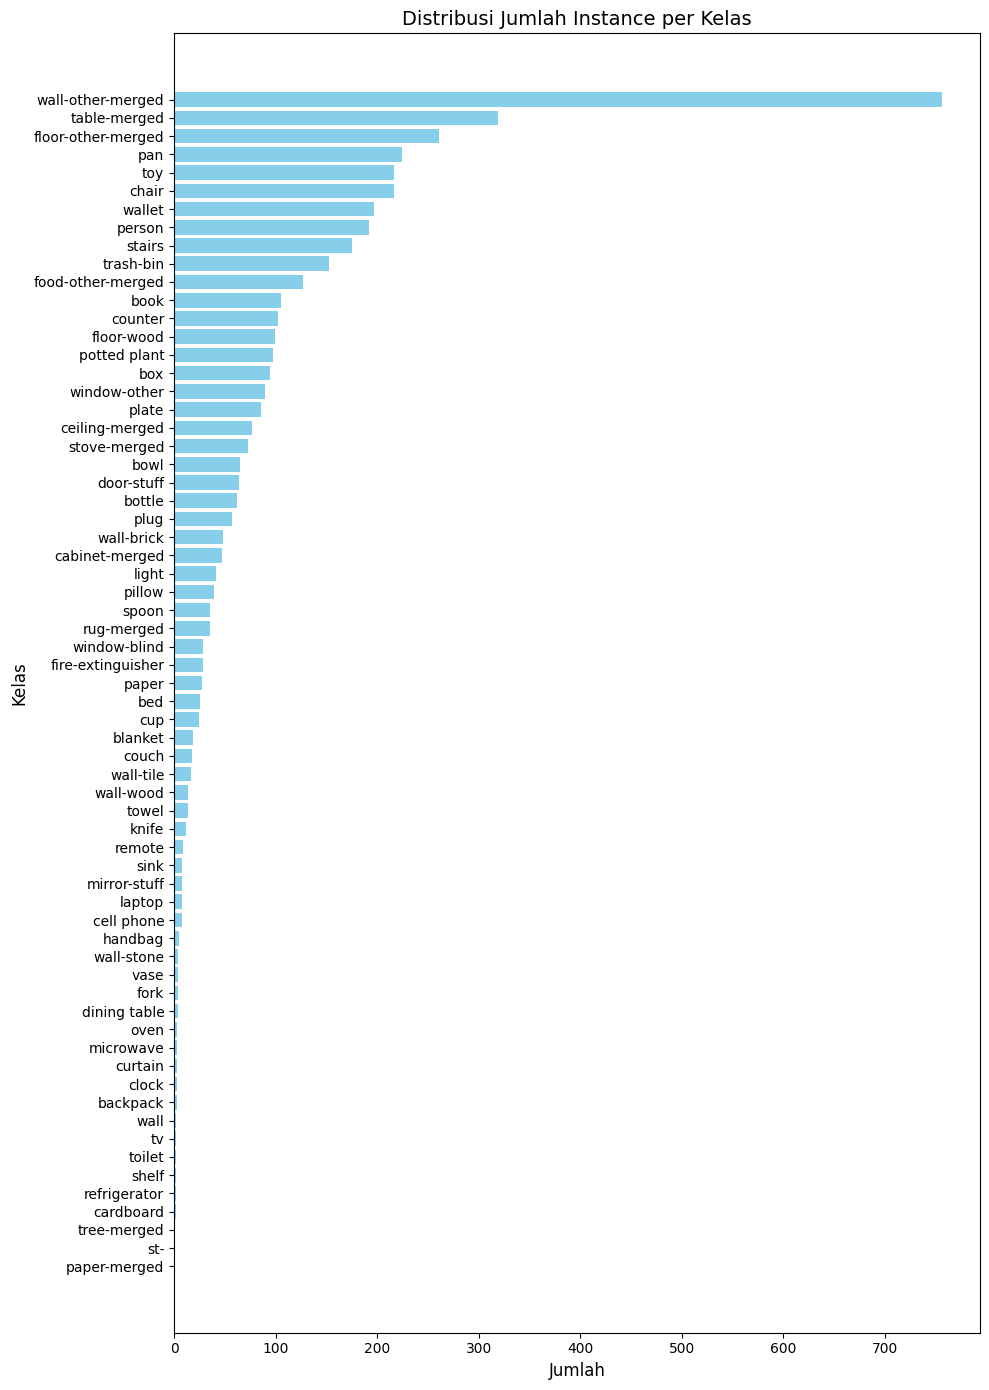

In [8]:
category_ids = [ann["category_id"] for ann in coco["annotations"]]
category_counts = Counter(category_ids)
category_names = {cat["id"]: cat["name"] for cat in coco["categories"]}

names = [category_names[i] for i in category_counts.keys()]
counts = [category_counts[i] for i in category_counts.keys()]

sorted_pairs = sorted(zip(counts, names), reverse=True)
counts, names = zip(*sorted_pairs)

plt.figure(figsize=(10, 14))
plt.barh(names, counts, color="skyblue")
plt.title("Distribusi Jumlah Instance per Kelas", fontsize=14)
plt.xlabel("Jumlah", fontsize=12)
plt.ylabel("Kelas", fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


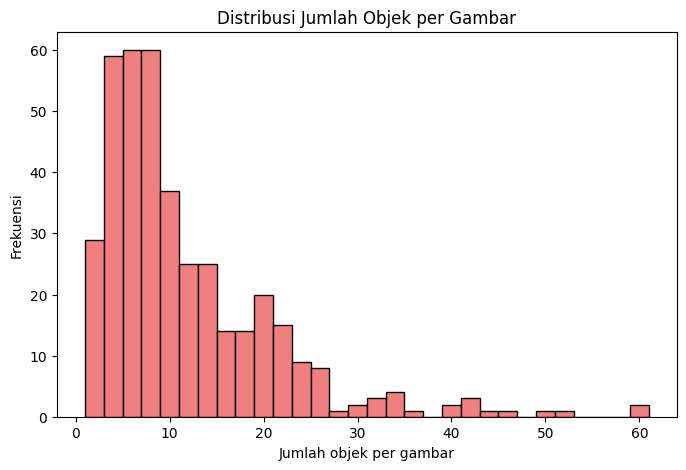

In [9]:
# Hitung jumlah objek di setiap gambar
image_ids = [ann["image_id"] for ann in coco["annotations"]]
image_counts = Counter(image_ids)

plt.figure(figsize=(8, 5))
plt.hist(image_counts.values(), bins=30, color="lightcoral", edgecolor="black")
plt.title("Distribusi Jumlah Objek per Gambar")
plt.xlabel("Jumlah objek per gambar")
plt.ylabel("Frekuensi")
plt.show()

In [12]:
image_counts_df = pd.DataFrame(list(image_counts.items()), columns=['image_id', 'num_objects'])
image_counts_df.head()

,image_id,num_objects
0,0,16
1,1,5
2,2,11
3,3,9
4,4,21


In [13]:
top_outliers = image_counts_df.sort_values(by='num_objects', ascending=False).head(5)
top_outliers

,image_id,num_objects
29,29,61
47,47,60
254,254,51
337,337,50
100,100,45


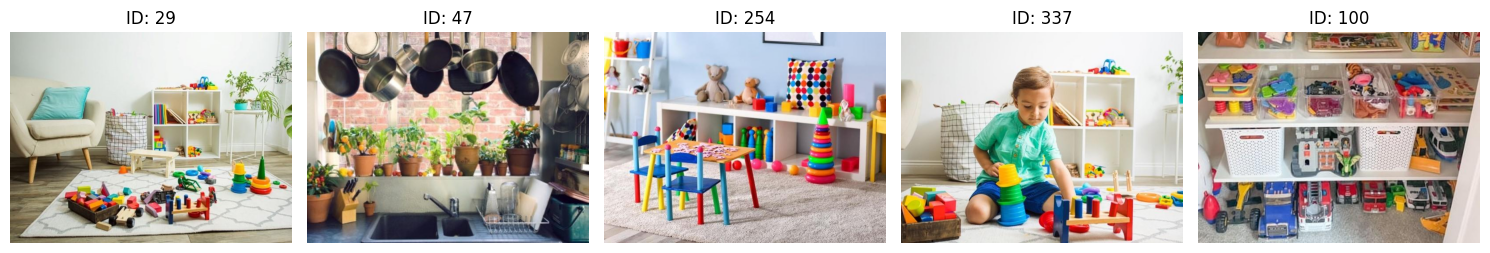

In [18]:
outlier_ids = [29, 47, 254, 337, 100]
image_dir = "/content/dataset/train"

plt.figure(figsize=(15, 6))

for i, image_id in enumerate(outlier_ids, 1):
    file_name = None
    for img_info in coco["images"]:
        if img_info["id"] == image_id:
            file_name = img_info["file_name"]
            break

    if file_name is None:
        print(f"Tidak ditemukan file_name untuk image_id {image_id}")
        continue

    img_path = os.path.join(image_dir, file_name)
    if not os.path.exists(img_path):
        print(f"File tidak ditemukan: {img_path}")
        continue

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(outlier_ids), i)
    plt.imshow(img)
    plt.title(f"ID: {image_id}")
    plt.axis("off")

plt.tight_layout()
plt.show()